# Instalación de librerías

In [ ]:
# Pandas, para manejo y análisis de datos
pip install pandas

# sklearn, para machine learning y clustering
pip install scikit-learn

# nltk, para procesamiento de lenguaje natural
pip install nltk

# spacy, para procesamiento de lenguaje natural
pip install spacy

# matplotlib, para visualización de datos
pip install matplotlib

# seaborn, para visualización de datos
pip install seaborn

# numpy, para manejo de arreglos y matrices
pip install numpy

# gensim, para modelado de tópicos
pip install gensim

# re, para manejo de expresiones regulares
pip install regex


# Clusterización método K-Means

K-means es un algoritmo de clusterización que particiona un conjunto de datos en K grupos predefinidos. Funciona iterativamente asignando cada punto de datos al centroide más cercano y luego recalculando los centroides basándose en las asignaciones actuales. El proceso comienza seleccionando K puntos iniciales como centroides, generalmente de forma aleatoria. En cada iteración, el algoritmo calcula la distancia de cada punto a todos los centroides, asigna cada punto al cluster del centroide más cercano, y luego actualiza la posición de cada centroide como el promedio de todos los puntos en su cluster. Este ciclo se repite hasta que los centroides se estabilizan o se alcanza un número máximo de iteraciones. K-means tiende a producir clusters compactos y esféricos, y su eficacia depende en gran medida de la inicialización de los centroides y la elección adecuada del número K de clusters.

### Importación de librerías

In [ ]:
# Importación de librerías
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Lectura del archivo Excel
df_para_cluster = pd.read_excel("C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/2024 05 14 - Base Original_hashtag.xlsx")

In [ ]:
# Vectorización de los textos
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=None)

In [6]:
# Convierte los valores de la columna Descripcion a cadenas de texto
df_para_cluster['HashTag'] = df_para_cluster['HashTag'].astype(str)

# Ajusta y transforma las descripciones
tfidf_matrix = tfidf_vectorizer.fit_transform(df_para_cluster['HashTag'])

# Estandariza los datos 
scaler = StandardScaler(with_mean=False)
tfidf_matrix_standardized = scaler.fit_transform(tfidf_matrix)

# En este ejemplo, utilizaremos un número arbitrario de clusters (51 clusters)
num_clusters = 51

# Aplica K-Means
kmeans = KMeans(n_clusters=num_clusters)
df_para_cluster['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Define etiquetas para los clusters (esto debe basarse en su análisis de los clusters)
etiquetas_clusters = {
    0: "Cluster A",
    1: "Cluster B",
    2: "Cluster C",
    3: "Cluster D",
    4: "Cluster E",
    5: "Cluster F",
    6: "Cluster G",
    7: "Cluster H",
    8: "Cluster I"
}

# Asigna etiquetas a las entidades en función de los clusters
df_para_cluster['etiqueta'] = df_para_cluster['cluster'].map(etiquetas_clusters)

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Guarda el DataFrame con los clusters en un archivo Excel
output_file = "C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/KMeans/clusters.xlsx"
df_para_cluster.to_excel(output_file, index=False)

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


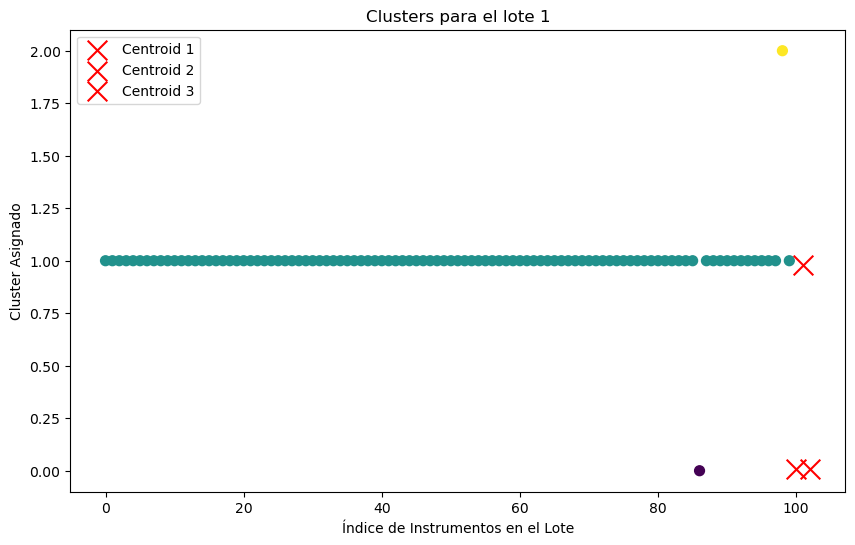

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


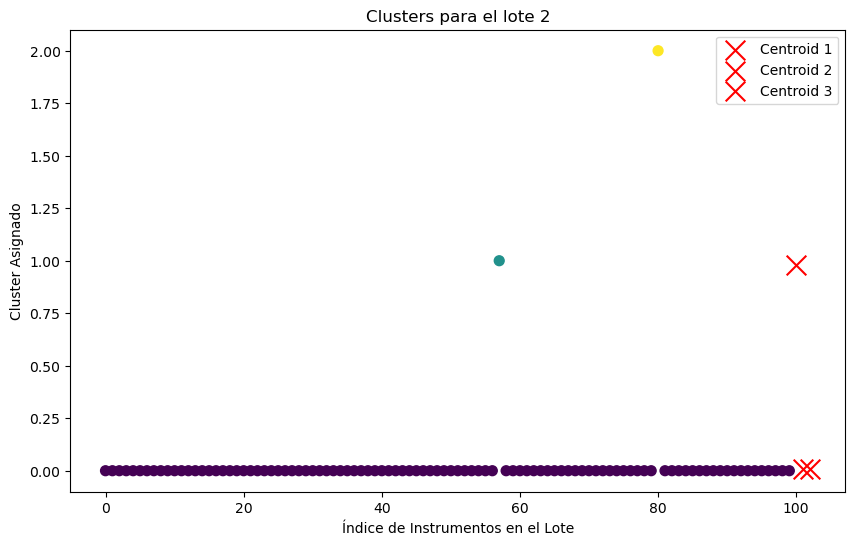

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


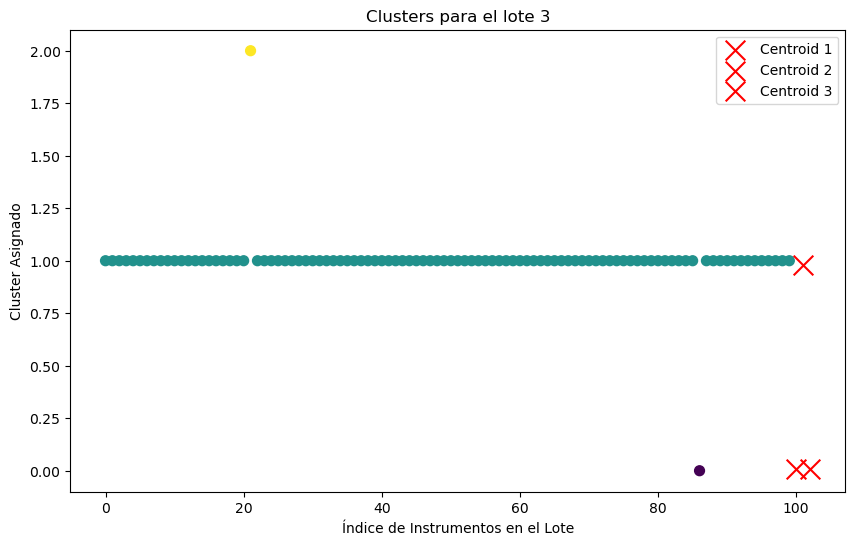

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


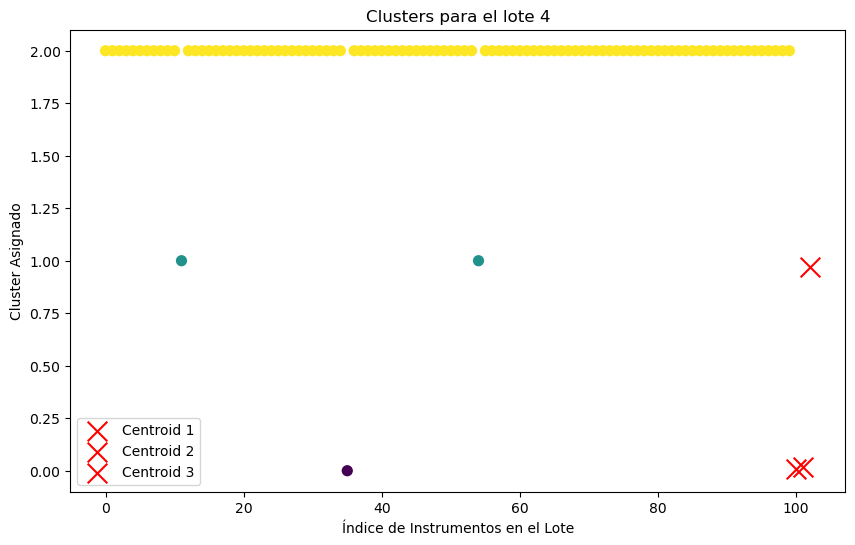

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


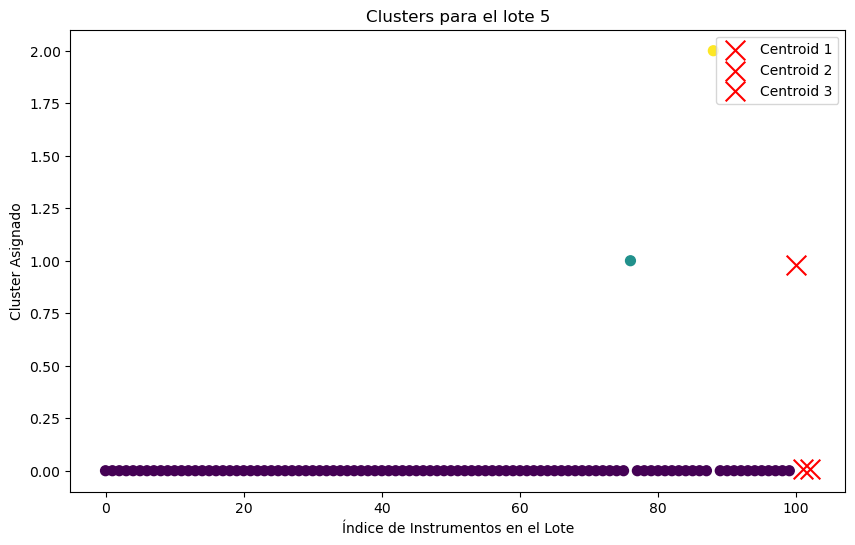

c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


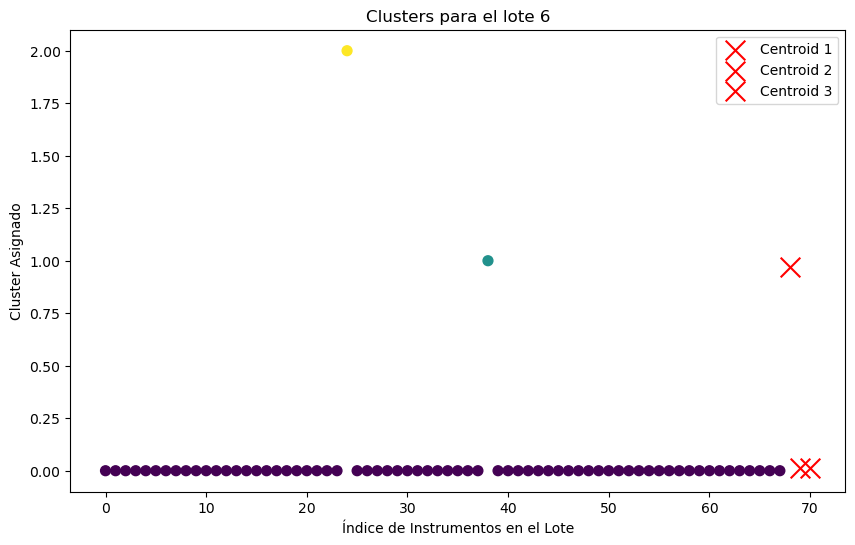

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo Excel
file_path = "C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Instrumentos_con_HashTag_Combinado.xlsx"
df = pd.read_excel(file_path)
# Usar TF-IDF para convertir los hashtags en vectores numéricos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['HashTag'])

# Normalización de los datos usando StandardScaler
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Dividir los datos en bloques de 100 instrumentos
n_batches = len(df) // 100 + (1 if len(df) % 100 != 0 else 0)

# Función para aplicar KMeans en bloques de 100 instrumentos
def apply_kmeans_batch(X_batch, df_batch, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_batch)
    df_batch['Cluster'] = clusters
    centroids = kmeans.cluster_centers_
    
    return df_batch, centroids, kmeans

# Visualización por lotes
for batch in range(n_batches):
    # Definir el rango de instrumentos
    start_idx = batch * 100
    end_idx = min((batch + 1) * 100, len(df))
    
    # Extraer los datos para el lote actual
    X_batch = X_scaled[start_idx:end_idx]
    df_batch = df.iloc[start_idx:end_idx].copy()
    
    # Aplicar KMeans
    df_batch, centroids, kmeans = apply_kmeans_batch(X_batch, df_batch)
    
    # Visualizar los clusters
    plt.figure(figsize=(10, 6))
    
    # Graficar los puntos de los instrumentos en función de dos componentes de los datos originales
    plt.scatter(np.arange(len(df_batch)), kmeans.labels_, c=df_batch['Cluster'], cmap='viridis', s=50)
    
    # Graficar los centroides
    for i, centroid in enumerate(centroids):
        plt.scatter(len(df_batch) + i, np.mean(kmeans.labels_ == i), color='red', marker='x', s=200, label=f'Centroid {i+1}')
    
    plt.title(f'Clusters para el lote {batch+1}')
    plt.xlabel('Índice de Instrumentos en el Lote')
    plt.ylabel('Cluster Asignado')
    plt.legend()
    plt.show()
# Guardar el resultado con los clusters asignados
df.to_excel('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/KMeans/Instrumentos_con_clusters.xlsx', index=False)


In [8]:
# ruta_archivo = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Insumos Clusterización/Base Original.xlsx'  # Reemplaza esto con la ruta real de tu archivo
    
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Definición de los criterios
tipos_usuario = ["Emprendedores", "Mipymes", "Grandes empresas", "Gobierno", "Academia", "Entidades de soporte", "Personas naturales"]

tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 'Asistencia técnica y Consultoría',
               'Tipo de Redes de Colaboración', 'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos',
               'Compra Pública', 'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']

objetivos_politica = ["Innovación", "Emprendimiento", "Economía Popular", "Transferencia de Conocimiento y Tecnología",
                      "Investigación", "Formación de Capital Humano", "Propiedad intelectual", "Calidad",
                      "Clúster o encadenamientos", "Financiación", "Comercialización", "Formalización",
                      "Crecimiento Sostenible", "Inclusión Financiera", "Comercio Electrónico",
                      "Educación económica y financiera", "Competencias Digitales"]

def cargar_datos(ruta_archivo):
    # Cargar el archivo Excel
    df = pd.read_excel(ruta_archivo)
    return df

def preprocesar_datos(df):
    # Convertir 'Si' a 1 y 'No' a 0, ignorando mayúsculas/minúsculas
    df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
    df = df.replace({'si': 1, 'no': 0})
    
    # Convertir todas las columnas relevantes a numéricas
    for col in tipos_usuario + tipos_apoyo + objetivos_politica:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            df[col] = 0  # Si no existe, se asume que no aplica
    
    # Identificar columnas numéricas
    columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Imputar valores faltantes
    imputer_numerico = SimpleImputer(strategy='constant', fill_value=0)
    df[columnas_numericas] = imputer_numerico.fit_transform(df[columnas_numericas])
    
    # Estandarizar variables numéricas
    scaler = StandardScaler()
    df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
    
    return df

def clusterizar_instrumentos(df):
    # Crear un identificador único para cada combinación de usuario y objetivo
    df['id_usuario_objetivo'] = df[tipos_usuario + objetivos_politica].astype(str).apply(lambda row: ''.join(row), axis=1)
    
    # Agrupar por id_usuario_objetivo y contar los tipos de apoyo diferentes
    grupos = df.groupby('id_usuario_objetivo')
    
    clusters = []
    for nombre, grupo in grupos:
        apoyos_diferentes = (grupo[tipos_apoyo] > 0).sum().sum()  # Contar cuántos tipos de apoyo diferentes hay
        if apoyos_diferentes > 1:  # Si hay más de un tipo de apoyo
            clusters.append(grupo)
    
    return clusters

def exportar_resultados(clusters, ruta_salida):
    """
    Exporta los resultados de la clusterización a un archivo Excel.
    
    :param clusters: Lista de DataFrames, cada uno representando un cluster
    :param ruta_salida: Ruta donde se guardará el archivo Excel
    """
    with pd.ExcelWriter(ruta_salida, engine='openpyxl') as writer:
        for i, cluster in enumerate(clusters, 1):
            # Añadir una columna para identificar el cluster
            cluster['Cluster'] = i
            
            # Guardar cada cluster en una hoja separada
            cluster.to_excel(writer, sheet_name=f'Cluster_{i}', index=False)
        
        # Crear una hoja de resumen
        resumen = pd.DataFrame({
            'Cluster': range(1, len(clusters) + 1),
            'Número de Instrumentos': [len(cluster) for cluster in clusters]
        })
        resumen.to_excel(writer, sheet_name='Resumen', index=False)

def main():
    ruta_archivo = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Insumos Clusterización/Base Original.xlsx'  # Reemplaza esto con la ruta real de tu archivo
    ruta_salida = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Insumos Clusterización/resultados_clusters.xlsx'
    
    # Cargar datos
    df = cargar_datos(ruta_archivo)
    
    # Preprocesar datos
    df_procesado = preprocesar_datos(df)
    
    # Clusterizar instrumentos
    clusters = clusterizar_instrumentos(df_procesado)
    
    # Imprimir resultados
    print(f"Se encontraron {len(clusters)} clusters de instrumentos.")
    for i, cluster in enumerate(clusters, 1):
        print(f"\nCluster {i}:")
        print(f"Número de instrumentos: {len(cluster)}")
        print("Usuarios comunes:")
        print(cluster[tipos_usuario].mean()[cluster[tipos_usuario].mean() > 0])
        print("Objetivos comunes:")
        print(cluster[objetivos_politica].mean()[cluster[objetivos_politica].mean() > 0])
        print("Tipos de apoyo presentes:")
        print(cluster[tipos_apoyo].mean()[cluster[tipos_apoyo].mean() > 0])
        print("-" * 50)
    
    # Exportar resultados a Excel
    exportar_resultados(clusters, ruta_salida)
    print(f"Los resultados han sido exportados a: {ruta_salida}")

if __name__ == "__main__":
    main()

Se encontraron 155 clusters de instrumentos.

Cluster 1:
Número de instrumentos: 2
Usuarios comunes:
Series([], dtype: float64)
Objetivos comunes:
Formación de Capital Humano    1.15552
dtype: float64
Tipos de apoyo presentes:
Formación de Talento Humano    1.271941
dtype: float64
--------------------------------------------------

Cluster 2:
Número de instrumentos: 1
Usuarios comunes:
Series([], dtype: float64)
Objetivos comunes:
Transferencia de Conocimiento y Tecnología    1.312194
Clúster o encadenamientos                     2.307179
Comercialización                              2.066212
dtype: float64
Tipos de apoyo presentes:
Formación de Talento Humano         1.271941
Asistencia técnica y Consultoría    1.278521
Incentivos Tributarios              6.683313
Eventos                             2.188317
Compra Pública                      3.329900
Bonos o Vouchers                    7.097535
Instrumentos Regulatorios           2.544156
dtype: float64
-----------------------------

# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

BIRCH es un algoritmo de clustering que se utiliza para agrupar datos en una estructura jerárquica, lo que significa que puede identificar clusters principales y subclusters.

In [8]:
# Importación de librerías
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import Birch
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import spacy


# Descarga los recursos de NLTK si no están disponibles
nltk.download('punkt')
nltk.download('stopwords')

# Lee el archivo Excel
df_para_cluster = pd.read_excel("C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx")

# Convierte los valores de la columna 'Palabras Clave' a cadenas de texto
df_para_cluster['Descripción'] = df_para_cluster['Descripción'].astype(str)

# Inicializa el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_para_cluster['Descripción'])

# Inicializa el modelo BIRCH
birch = Birch(threshold=0.01, branching_factor=90, n_clusters=51, compute_labels=True)

# Ajusta el modelo BIRCH a los datos
birch.fit(tfidf_matrix)

# Obtiene los clusters encontrados
labels = birch.labels_
n_clusters = len(set(labels))

# Añade las etiquetas de clusters al DataFrame
df_para_cluster['cluster'] = labels

# Carga el modelo de lenguaje en español de SpaCy
nlp = spacy.load("es_core_news_sm")

# Función para lematizar y extraer frases representativas de un cluster
def extract_representative_phrases(cluster_df, cluster_id, num_phrases=5):
    cluster_indices = cluster_df[cluster_df['cluster'] == cluster_id].index
    cluster_phrases = []

    stopwords_set = set(stopwords.words('spanish'))

    for index in cluster_indices:
        text = cluster_df.loc[index, 'Descripción']
        sentences = sent_tokenize(text)
        cluster_phrases.extend(sentences)

    # Preprocesamiento de las oraciones
    preprocessed_phrases = []
    for phrase in cluster_phrases:
        # Tokenización de palabras y lematización
        doc = nlp(phrase)
        lemmatized_words = [token.lemma_ for token in doc if token.text.lower() not in stopwords_set]
        preprocessed_phrases.append(" ".join(lemmatized_words))

    # Cálculo de la frecuencia de las oraciones
    fdist = FreqDist(preprocessed_phrases)
    top_phrases = fdist.most_common(num_phrases)

    return [phrase[0] for phrase in top_phrases]

# Extraer y mostrar las frases más representativas para cada cluster
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    representative_phrases = extract_representative_phrases(df_para_cluster, cluster_id, num_phrases=1)
    for phrase in representative_phrases:
        print(phrase)
    print()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 0:
PROCOLOMBIA , disposición servicio    Programas Formación Exportadora ,   mediante poder capacitar él manera práctico , gratuito propio ritmo , proporcionar

Cluster 1:
nar

Cluster 2:
Información evento interés salud público

Cluster 3:
buscar definir implementar ruta metodológico aplicación programa tratamiento penitenciario integral población privado libertad condenado nivel intramural extramural ( prisión domiciliario ) , así dar respuesta necesidad estructurar programa intervención dirigido población reincidente ; igualmente , diseño modelo seguimiento ejecución programa tratamiento .

Cluster 4:
generar información estrategia protección salvaguardia Conocimientos Tradicionales relacionado Biodiversidad tradición indígena permitir evaluar , hacer seguimiento generar insumos modos vida entorno socioambiental pueblo indígena amazónico .

Cluster 5:
proporcionar comunidad información documental estádistica objetivo , confiable actualizado política criminal adulto adolescen

In [9]:
# Guardar el DataFrame en un archivo Excel
output_file = "C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/BIRCH/clusters.xlsx"
df_para_cluster.to_excel(output_file, index=False)

print(f"DataFrame guardado en {output_file}")

DataFrame guardado en C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/BIRCH/clusters.xlsx


### Visualización gráfica de la clusterización - Descomposición por Componentes Principales

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir la dimensionalidad de las descripciones
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Asignar etiquetas de clúster a tus observaciones
df_para_cluster['Cluster'] = labels

# Visualización de clusters con gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df_para_cluster['Cluster'], palette='viridis')
plt.title('Gráfico de Dispersión de Clusters')
plt.show()


NameError: name 'labels' is not defined

### Prueba para verificar la calidad del Clustering

### Davies-Bouldin


La métrica Davies-Bouldin es un método para evaluar la calidad del clustering que mide la relación entre la dispersión interna de los clusters y la separación entre ellos. Calcula la similitud máxima entre cada cluster y los demás, promediando estos valores para todos los clusters. Un índice Davies-Bouldin más bajo indica un mejor clustering, sugiriendo clusters más compactos y mejor separados. Esta métrica es independiente del número de clusters, lo que permite comparar soluciones con diferentes cantidades de grupos. 

In [12]:
from sklearn.metrics import davies_bouldin_score

# Obtén las muestras y las etiquetas de los clusters
samples = tfidf_matrix.toarray()  # Las observaciones en forma de matriz NumPy
labels = df_para_cluster['Cluster'].values  # Las etiquetas de clúster

# Calcula el índice Davies-Bouldin
db_index = davies_bouldin_score(samples, labels)

print(f'Índice Davies-Bouldin: {db_index}')

# Me bota un resultado de 3.02, lo cual no es óptimo ya que está lejos del 0. Indica que no hay una separación
# óptima entre clústers.


Índice Davies-Bouldin: 3.025815624696044


# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clusterización que se basa en la densidad de los puntos de datos. Aquí te presento una descripción concisa de sus características principales:

1. Enfoque basado en densidad: Agrupa puntos que están densamente conectados.
2. No requiere especificar el número de clusters a priori.
3. Puede detectar clusters de formas arbitrarias.
4. Identifica puntos de ruido o outliers.

5. Posee dos parámetros clave:

    - Epsilon (ε): Define el radio de vecindad.
    - MinPts: Número mínimo de puntos en la vecindad para formar un cluster.


6. Clasifica puntos en tres categorías:

    - Puntos núcleo: Tienen al menos MinPts vecinos en su radio ε.
    - Puntos de borde: Están en el radio de un punto núcleo pero tienen menos de MinPts vecinos.
    - Puntos de ruido: No son ni núcleo ni de borde.

7. Eficaz en datasets con clusters de densidad variable y ruido.
9. Limitaciones: Sensible a la elección de parámetros y puede tener dificultades con clusters de densidades muy diferentes.

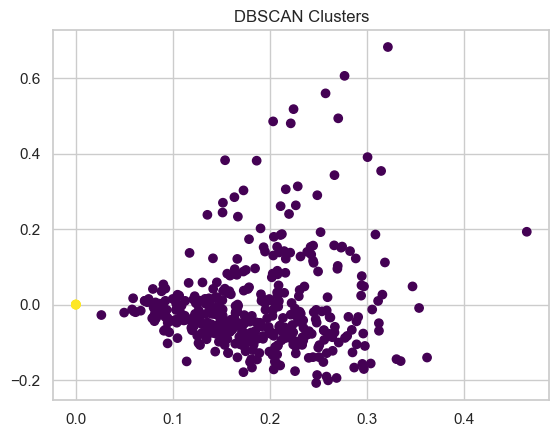

Silhouette Score: -0.26844683145002435
                                           Descripción  Cluster
0    Procesos de socialización del protocolo con re...       -1
1    Conjunto de herramientas virtuales, digitales,...       -1
2    Busca promover a Colombia  como  destino  de  ...       -1
3    Brindar asistencia técnica a los Entes descent...       -1
4    PROCOLOMBIA, tiene a su disposición un servici...       -1
..                                                 ...      ...
410  El presente proyecto GEF puede ayudar a los pa...       -1
411                                                           0
412                                                           0
413                                                           0
414                                                           0

[415 rows x 2 columns]


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Cargar datos desde un archivo Excel
file_path = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Limpieza de datos: reemplaza los valores nulos por un valor predeterminado (en este caso, una cadena vacía)
data['Descripción'].fillna('', inplace=True)

# Descriptivas de la columna descripción
descriptions = data['Descripción']

# Palabras que no queremos que tenga en cuenta durante la ejecución del algoritmo
stop_words_spanish = ['realización','acuerdo','facilitar','sujetos','cuenta','teniendo','requiere','contribuyendo','necesarias', 
                      'gestión', 'efectos', 'prácticas', 'uso', 'garantizar', 'responsables', 
                      'independientes', 'varias','estas','sobre','cada','cuando', 'mismo', 
                      'deben','frente','presentan', 'desarrollan', 'vez', 'cual','lograr',
                      'acción','además','uno', 'la', 'el', 'en', 'y', 'a', 'que', 'es', 
                      'por', 'un', 'para', 'con', 'como', 'así', 'esto', 'sin', 'sus', 'su', 
                      '2017','son', 'dirigida', 'puede', 'pueden', 'tienen', 'cualquier','según',
                     'dar', 'corresponde', 'tanto', 'siguientes', 'permiten','basado','busca',
                     'relacionado', 'presentar','mayor', 'las', 'los', 'de', 'del']

# Crear una representación vectorial de TF-IDF de las descripciones
vectorizer = TfidfVectorizer(stop_words=stop_words_spanish, max_features=500)
tfidf_matrix = vectorizer.fit_transform(descriptions)

# Reducción de dimensionalidad para visualización
svd = TruncatedSVD(n_components=2)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan.fit(tfidf_matrix)

# Agregar etiquetas de cluster al DataFrame
data['cluster'] = dbscan.labels_

# Visualización de los clusters en un espacio bidimensional
plt.scatter(tfidf_matrix_reduced[:, 0], tfidf_matrix_reduced[:, 1], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()

# Calcular la puntuación de Silhouette
silhouette_avg = silhouette_score(tfidf_matrix, dbscan.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Visualización de los resultados
result_df = pd.DataFrame({'Descripción': descriptions, 'Cluster': dbscan.labels_})
print(result_df)


# Algoritmo de propagación por afinidad

Affinity Propagation es un algoritmo de clustering que no requiere especificar el número de clusters a priori. Aquí tienes una descripción concisa de sus características principales:

1. Enfoque basado en mensajes: Los puntos de datos intercambian mensajes para formar clusters.
2. Auto-determinación de clusters: El algoritmo decide el número óptimo de clusters.
3. Concepto de "ejemplares": Cada cluster es representado por un punto de datos real.
4. Dos tipos de mensajes:

    - Responsabilidad: Refleja cuán adecuado es un punto para ser ejemplar de otro.
    - Disponibilidad: Indica qué tan apropiado sería para un punto elegir otro como su ejemplar.

5. Matriz de similitud: Base para el intercambio de mensajes entre puntos.
6. Parámetro clave: Factor de preferencia, que influye en el número de clusters formados.
7. Proceso iterativo: Los mensajes se actualizan hasta que convergen o se alcanza un número máximo de iteraciones.
8. Ventajas:

    - Puede descubrir clusters no esféricos.
    - No requiere inicialización de centroides.
    - Funciona bien con datasets pequeños a medianos.

9. Limitaciones:

    - Puede ser computacionalmente costoso para grandes conjuntos de datos.
    - Sensible al parámetro de preferencia.

In [16]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

def mostrar_clusteres_cercanos(cluster_distances, clusters, min_distance, max_distance):
    cluster_pairs = set()  # Usamos un conjunto para evitar duplicados
    n_clusters = len(clusters)
    
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):  # Solo iteramos sobre la mitad superior de la matriz (evita duplicados)
            distance = cluster_distances[i, j]
            if min_distance <= distance <= max_distance:
                cluster_pairs.add((clusters[i], clusters[j], distance))
    
    return list(cluster_pairs)  # Convertimos el conjunto de nuevo en una lista

#def mostrar_clusteres_cercanos(cluster_distances, clusters, min_distance, max_distance):
#    cluster_pairs = []
#    n_clusters = len(clusters)
    
#    for i in range(n_clusters):
#        for j in range(n_clusters):
#            if i != j:
#                distance = cluster_distances[i, j]
#                if min_distance <= distance <= max_distance:
#                    cluster_pairs.append((clusters[i], clusters[j], distance))
    
#    return cluster_pairs

# Cargar tus datos en un DataFrame
data = pd.read_excel('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx')

data = data.dropna(subset=['Descripción'])

# Preprocesamiento de texto (puede variar según tus necesidades)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Descripción'])

# Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(affinity="euclidean", random_state=None, damping=0.5)
affinity_propagation.fit(tfidf_matrix)

# Assign each data point to a cluster
result = affinity_propagation.predict(tfidf_matrix)

# Get all of the unique clusters
clusters = np.unique(result)

# Asignar etiquetas de clúster a tus observaciones
data['Cluster'] = affinity_propagation.labels_

# Calcular centroides de clústeres
cluster_centers = np.array([tfidf_matrix[data['Cluster'] == cluster].mean(axis=0) for cluster in clusters])

# Calcular la matriz de distancias de coseno entre los centroides de los clústeres
n_clusters = len(clusters)
cluster_distances = np.zeros((n_clusters, n_clusters))

for i in range(n_clusters):
    for j in range(n_clusters):
        if i != j:
            distance = cosine_distances(cluster_centers[i], cluster_centers[j])
            cluster_distances[i, j] = distance

print("Distancia entre clústeres:")
print(cluster_distances)

# Mostrar los clústeres más cercanos en el rango deseado (por ejemplo, 80% - 95%)
min_distance = 0.80
max_distance = 0.95

cluster_pairs = mostrar_clusteres_cercanos(cluster_distances, clusters, min_distance, max_distance)

# Crear un diccionario que mapea cada clúster a sus clústeres cercanos
cluster_mapping = {}
for cluster1, cluster2, _ in cluster_pairs:
    if cluster1 not in cluster_mapping:
        cluster_mapping[cluster1] = []
    if cluster2 not in cluster_mapping:
        cluster_mapping[cluster2] = []
    cluster_mapping[cluster1].append(cluster2)
    cluster_mapping[cluster2].append(cluster1)

# Función para obtener los clústeres más cercanos en formato de cadena
#def obtener_clusteres_cercanos(cluster):
#    return ', '.join([str(c) for c in cluster_mapping[cluster]])

    # Función para obtener los clústeres más cercanos en formato de cadena y ordenados
def obtener_clusteres_cercanos(cluster):
    cluster_list = cluster_mapping[cluster]
    cluster_list.sort()  # Ordenar la lista de clústeres de menor a mayor
    return ', '.join([str(c) for c in cluster_list])

# Agregar la columna "Clusteres más cercanos" al DataFrame original
data['Clusteres más cercanos'] = data['Cluster'].apply(obtener_clusteres_cercanos)


# Exportar el DataFrame a un archivo de Excel
data.to_excel('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/Affinity Propagation/clusters.xlsx', index=False)


Distancia entre clústeres:
[[0.         0.73788407 0.91074123 ... 0.87040879 0.9706298  0.85722002]
 [0.73788407 0.         0.72269321 ... 0.68814486 0.93000691 0.70279261]
 [0.91074123 0.72269321 0.         ... 0.84494831 0.95586909 0.85491217]
 ...
 [0.87040879 0.68814486 0.84494831 ... 0.         0.95614195 0.81914637]
 [0.9706298  0.93000691 0.95586909 ... 0.95614195 0.         0.9587199 ]
 [0.85722002 0.70279261 0.85491217 ... 0.81914637 0.9587199  0.        ]]


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
from nltk.corpus import stopwords
import nltk

# Descargar stopwords en español
nltk.download('stopwords', quiet=True)
stop_words_spanish = list(stopwords.words('spanish'))

# Función para cargar y preparar los datos
def cargar_datos(archivo_excel):
    df = pd.read_excel(archivo_excel)
    return df

# Función para procesar las características adicionales
def procesar_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica):
    for tipo in tipos_usuario + tipos_apoyo + objetivos_politica:
        df[tipo] = df[tipo].map({'Si': 1, 'No': 0})
    return df

# Función para crear la matriz de características
def crear_matriz_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica):
    caracteristicas = df[tipos_usuario + tipos_apoyo + objetivos_politica].values
    return caracteristicas

# Función para calcular la similitud combinada
def calcular_similitud_combinada(tfidf_matrix, caracteristicas, peso_tfidf=0.7):
    similitud_tfidf = 1 - pairwise_distances(tfidf_matrix.toarray(), metric='cosine')
    similitud_caracteristicas = 1 - pairwise_distances(caracteristicas, metric='jaccard')
    similitud_combinada = peso_tfidf * similitud_tfidf + (1 - peso_tfidf) * similitud_caracteristicas
    return similitud_combinada

# Función principal de clusterización
def clusterizar_instrumentos(archivo_excel, tipos_usuario, tipos_apoyo, objetivos_politica):
    # Cargar y preparar datos
    df = cargar_datos(archivo_excel)
    df = procesar_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica)
    
    df = df.dropna(subset=['Descripción'])

    # Procesar descripciones
    vectorizer = TfidfVectorizer(stop_words=stop_words_spanish)
    tfidf_matrix = vectorizer.fit_transform(df['Descripción'])
    
    # Crear matriz de características adicionales
    caracteristicas = crear_matriz_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica)
    
    # Calcular similitud combinada
    similitud_combinada = calcular_similitud_combinada(tfidf_matrix, caracteristicas)
    
    # Aplicar Affinity Propagation
    af = AffinityPropagation(affinity='precomputed', random_state=42, max_iter=500, convergence_iter=50)
    clusters = af.fit_predict(similitud_combinada)
    
    # Agregar resultados al DataFrame
    df['Cluster'] = clusters
    
    return df

# Ejemplo de uso
tipos_usuario = ["Emprendedores", "Mipymes", "Grandes empresas", "Gobierno", "Academia", "Entidades de soporte", "Personas naturales"]
tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']
objetivos_politica = ["Innovación", "Emprendimiento", "Economía Popular", "Transferencia de Conocimiento y Tecnología", "Investigación", "Formación de Capital Humano", "Propiedad intelectual", "Calidad", "Clúster o encadenamientos", "Financiación", "Comercialización", "Formalización", "Crecimiento Sostenible", "Inclusión Financiera", "Comercio Electrónico", "Educación económica y financiera", "Competencias Digitales"]

resultado = clusterizar_instrumentos('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx', tipos_usuario, tipos_apoyo, objetivos_politica)
print(resultado[['Descripción', 'Cluster']])


c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


                                           Descripción  Cluster
0    Procesos de socialización del protocolo con re...       59
1    Conjunto de herramientas virtuales, digitales,...       38
2    Busca promover a Colombia  como  destino  de  ...       41
3    Brindar asistencia técnica a los Entes descent...        0
4    PROCOLOMBIA, tiene a su disposición un servici...       51
..                                                 ...      ...
406  Es una solución tecnológica que utilizando ins...       14
407  Los datos de las diferentes entidades del sect...       39
408  Este es un mecanismo a través del cual las ent...       69
409  Este es un mecanismo para que países de Améric...       69
410  El presente proyecto GEF puede ayudar a los pa...       12

[411 rows x 2 columns]


In [9]:
print(resultado[['Nombre del Instrumento','Descripción','Cluster']])

                                Nombre del Instrumento  \
0    Espacios de fortalecimiento del acceso a la ju...   
1    Herramientas digitales y virtuales para la int...   
2    Herramienta virtual para identificar oportunid...   
3                                   ASISTENCIA TECNICA   
4    Capacitación a personas y empresas colombianas...   
..                                                 ...   
406  Atención al vigilado a través de inteligencia ...   
407  Plataforma de Integración de Datos Sectoriales...   
408  Convocatoria Pública para Comisiones Mixtas de...   
409  Mecanismo Tripartito GIZ/Unión Europea/APC - C...   
410  Proyecto: Manejo integrado de los recursos híd...   

                                           Descripción  Cluster  
0    Procesos de socialización del protocolo con re...       59  
1    Conjunto de herramientas virtuales, digitales,...       38  
2    Busca promover a Colombia  como  destino  de  ...       41  
3    Brindar asistencia técnica a los E

In [10]:
# Exportar el DataFrame a un archivo de Excel
resultado.to_excel('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Resultados Clusterización/Affinity Propagation/clusters_criterios.xlsx', index=False)


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from nltk.corpus import stopwords
import nltk

# Descargar stopwords en español
nltk.download('stopwords', quiet=True)
stop_words_spanish = list(stopwords.words('spanish'))

def cargar_datos(archivo_excel):
    return pd.read_excel(archivo_excel)

def procesar_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica):
    for tipo in tipos_usuario + tipos_apoyo + objetivos_politica:
        df[tipo] = df[tipo].map({'Si': 1, 'No': 0})
    return df

def calcular_similitud_personalizada(df, tipos_usuario, tipos_apoyo, objetivos_politica):
    n = len(df)
    similitud = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            # Verificar si los tipos de usuario y objetivos de política son idénticos
            usuarios_iguales = np.array_equal(df[tipos_usuario].iloc[i], df[tipos_usuario].iloc[j])
            objetivos_iguales = np.array_equal(df[objetivos_politica].iloc[i], df[objetivos_politica].iloc[j])
            
            # Verificar si los tipos de apoyo son diferentes
            apoyos_diferentes = not np.array_equal(df[tipos_apoyo].iloc[i], df[tipos_apoyo].iloc[j])
            
            if usuarios_iguales and objetivos_iguales and apoyos_diferentes:
                # Calcular similitud de descripciones solo si se cumplen los criterios
                desc_i = df['Descripción'].iloc[i]
                desc_j = df['Descripción'].iloc[j]
                similitud_desc = 1 - pairwise_distances(vectorizer.transform([desc_i, desc_j]), metric='cosine')[0, 1]
                similitud[i, j] = similitud[j, i] = similitud_desc
            else:
                similitud[i, j] = similitud[j, i] = 0
    
    return similitud

def clusterizar_instrumentos(archivo_excel, tipos_usuario, tipos_apoyo, objetivos_politica):
    global vectorizer  # Hacemos el vectorizer global para usarlo en calcular_similitud_personalizada
    
    df = cargar_datos(archivo_excel)
    df = procesar_caracteristicas(df, tipos_usuario, tipos_apoyo, objetivos_politica)
    
    vectorizer = TfidfVectorizer(stop_words=stop_words_spanish)
    vectorizer.fit(df['Descripción'])
    
    similitud = calcular_similitud_personalizada(df, tipos_usuario, tipos_apoyo, objetivos_politica)
    
    # Usar Agglomerative Clustering con la similitud personalizada
    clustering = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='complete', distance_threshold=0.5)
    clusters = clustering.fit_predict(1 - similitud)  # Convertimos similitud a distancia
    
    df['Cluster'] = clusters
    return df

# Ejemplo de uso
tipos_usuario = ["Emprendedores", "Mipymes", "Grandes empresas", "Gobierno", "Academia", "Entidades de soporte", "Personas naturales"]
tipos_apoyo = ['Formación de Talento Humano', 'Tipo de Sistemas de Información', 'Asistencia técnica y Consultoría', 'Tipo de Redes de Colaboración', 'Apoyo Financiero', 'Incentivos Tributarios', 'Eventos', 'Compra Pública', 'Bonos o Vouchers', 'Premios y Reconocimientos', 'Instrumentos Regulatorios']
objetivos_politica = ["Innovación", "Emprendimiento", "Economía Popular", "Transferencia de Conocimiento y Tecnología", "Investigación", "Formación de Capital Humano", "Propiedad intelectual", "Calidad", "Clúster o encadenamientos", "Financiación", "Comercialización", "Formalización", "Crecimiento Sostenible", "Inclusión Financiera", "Comercio Electrónico", "Educación económica y financiera", "Competencias Digitales"]

resultado = clusterizar_instrumentos('C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx', tipos_usuario, tipos_apoyo, objetivos_politica)
print(resultado[['Descripción', 'Cluster']])

ValueError: np.nan is an invalid document, expected byte or unicode string.

# Gráfico de Clusteres

c:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


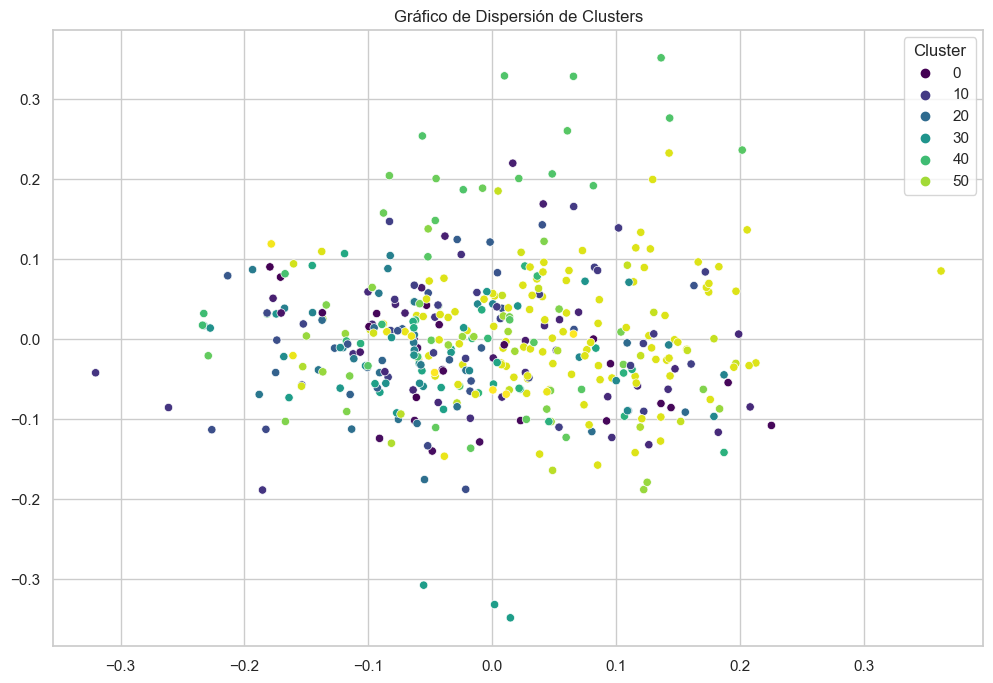

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir la dimensionalidad de las descripciones
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Asignar etiquetas de clúster a tus observaciones
data['Cluster'] = affinity_propagation.labels_

# Visualización de clusters con gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Gráfico de Dispersión de Clusters')
plt.show()


# Midiendo la calidad de la clusterización

## Indice Davies-Bouldin

In [19]:
from sklearn.metrics import davies_bouldin_score

# Obtén las muestras y las etiquetas de los clusters
samples = tfidf_matrix.toarray()  # Las observaciones en forma de matriz NumPy
labels = data['Cluster'].values  # Las etiquetas de clúster

# Calcula el índice Davies-Bouldin
db_index = davies_bouldin_score(samples, labels)

print(f'Índice Davies-Bouldin: {db_index}')

# Me bota un resultado de 3.31, lo cual no es óptimo ya que está lejos del 0. Indica que no hay una separación
# óptima entre clústers.


Índice Davies-Bouldin: 3.2247652360180092


# Modelos - Comparación

In [15]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import re

# Paso 1: Leer el archivo Excel
file_path = 'C:/Backup - Archivos de trabajo/DNP/Automatización ArCo/Excel/Base Original.xlsx'
df = pd.read_excel(file_path)


# Paso 2: Preprocesar tus datos y entrenar el modelo Word2Vec
# Supongamos que tus datos están en una columna llamada 'descripcion'
def preprocess_text(text):
    # Convierte el texto a minúsculas
    text = text.lower()
    # Elimina caracteres especiales y números, dejando solo palabras
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Divide el texto en palabras
    words = text.split()
    return words

sentences = [preprocess_text(str(desc)) for desc in df['Descripción']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Paso 3: Implementar los algoritmos de clustering
X = np.array([w2v_model.wv[word] for sentence in sentences for word in sentence])

# Algoritmos de clustering a probar
algorithms = {
    "K-Means": KMeans(n_clusters=51),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=51),
    "Agglomerative": AgglomerativeClustering(n_clusters=51),
    "MiniBatchKMeans": MiniBatchKMeans(n_clusters=51), 
    "AffinityPropagation": AffinityPropagation(), 

}

results = {}  # Almacenará las métricas de cada algoritmo

# Paso 4: Implementar y evaluar los algoritmos de clustering
for algo_name, algo in algorithms.items():
    algo.fit(X)  # Ajusta el algoritmo a tus datos
    labels = algo.labels_

    # Métricas de evaluación
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    results[algo_name] = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz
    }

# Paso 5: Visualizar resultados (opcional)

# Paso 6: Comparar y seleccionar el mejor algoritmo
best_algo = max(results, key=lambda x: results[x]['Silhouette Score'])
print("El mejor algoritmo según el coeficiente de silueta es:", best_algo)
print("Resultados:")
for algo_name, metrics in results.items():
    print(f"{algo_name}: Silhouette Score={metrics['Silhouette Score']}, Calinski-Harabasz Index={metrics['Calinski-Harabasz Index']}")


c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\sebas\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity pro

El mejor algoritmo según el coeficiente de silueta es: DBSCAN
Resultados:
K-Means: Silhouette Score=0.512890100479126, Calinski-Harabasz Index=1168256.2851835422
DBSCAN: Silhouette Score=0.7640301585197449, Calinski-Harabasz Index=108742.25374196623
Agglomerative: Silhouette Score=0.5217447876930237, Calinski-Harabasz Index=1169652.1234969066
MiniBatchKMeans: Silhouette Score=0.5017687678337097, Calinski-Harabasz Index=1163604.6436722619
AffinityPropagation: Silhouette Score=0.006418987177312374, Calinski-Harabasz Index=10333.332622954415
